# Testing Our Dog Breed Classifier Model

After training our model, we exported the calculated weights so we can test individual samples from our test data.

In [2]:
#import necessary libraries and load model

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from keras.preprocessing import image
from keras.applications.inception_resnet_v2 import preprocess_input, decode_predictions
from keras.models import load_model
import pickle

model = load_model('model.h5')

/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
#reads csv file of test data
breeds = pd.read_csv("sample_submission.csv")

In [28]:
#loads one image; index between 0 and 10356
img = breeds['id'][26]

#preprocesses image - normalizes pixel values
mage = image.load_img("test/" + img + ".jpg", target_size=(299, 299))
data = image.img_to_array(mage)
data = preprocess_input(np.expand_dims(mage, axis = 0))

y_pred = model.predict(data)
with open('encoder.pkl','rb') as f:
    one_hot = pickle.load(f)
    f.close()
y_pred

/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator LabelBinarizer from version 0.20.2 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


array([[1.63214779e-13, 2.08276088e-05, 1.59351323e-08, 1.41912335e-06,
        1.99923953e-08, 4.61453748e-12, 4.40838671e-10, 1.10958482e-11,
        7.47896456e-06, 7.12367012e-07, 3.10554568e-11, 2.57243640e-12,
        3.69933317e-04, 2.24946742e-10, 9.98992503e-01, 3.66410745e-06,
        3.19341183e-15, 9.16102010e-07, 4.96053719e-11, 1.76722474e-13,
        4.36865648e-12, 2.01853574e-08, 1.98526369e-08, 1.90065020e-05,
        5.06289932e-12, 4.90898710e-05, 2.37687543e-11, 3.76057137e-11,
        9.37207112e-09, 1.00084676e-14, 1.58015129e-11, 2.92446123e-10,
        5.09340282e-07, 1.07028675e-09, 3.76441961e-10, 9.24476398e-11,
        1.03654663e-09, 7.80926546e-10, 5.62872282e-09, 4.96794650e-09,
        1.26110660e-08, 7.89760826e-11, 9.96809579e-12, 7.56871822e-12,
        2.08365982e-08, 2.83155638e-10, 1.51681466e-04, 3.64642289e-10,
        1.55773119e-08, 6.45005002e-06, 3.29030672e-06, 1.04353887e-04,
        5.77847631e-11, 6.10858120e-09, 2.34109225e-11, 3.566326

In [20]:
#returns predicted breed based on output from model
def un_onehot(data):
    breed = one_hot.inverse_transform(data)
    return breed

In [29]:
#extracts dog's actual breed
breed_actual=np.argmax(y_pred)
breed_actual
breeds_1 = breeds.iloc[0]
breeds_1.to_frame()
breed_list = np.delete(breeds_1.index.values, 0)
breed_list[breed_actual]

'bloodhound'

In [30]:
#calculates predicted breed
breed_pred = un_onehot(y_pred)
breed_pred

array(['bloodhound'], dtype='<U30')

Predicted Breed: bloodhound
Actual Breed: bloodhound


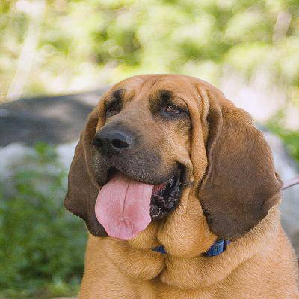

In [31]:
print("Predicted Breed: " + breed_pred[0])
print("Actual Breed: " + breed_list[breed_actual])

mage